In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [2]:
with open("airquality.csv") as f:
    airquality = pd.read_csv("airquality.csv").convert_dtypes()

In [3]:
(
    airquality.head()
    .style.hide_index()
)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.400000,67,5,1
36,118,8.000000,72,5,2
12,149,12.600000,74,5,3
18,313,11.500000,62,5,4
,,14.300000,56,5,5


In [4]:
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    Int64  
 1   Solar.R  146 non-null    Int64  
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    Int64  
 4   Month    153 non-null    Int64  
 5   Day      153 non-null    Int64  
dtypes: Int64(5), float64(1)
memory usage: 8.0 KB


### Prueba

Esto es una prueba realizar por GMR para ver si deja hacer push en un repositorio de otro usuario.

#### Background_gradient Pandas

In [5]:
(
    airquality.sample(10).dropna()
    .style.background_gradient(subset=['Solar.R', 'Temp'], cmap='YlOrBr')
    .background_gradient(subset=['Ozone', 'Wind'], cmap='PuBu')
)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190,7.400000,67,5,1
81,16,7,6.900000,74,7,21
2,12,149,12.600000,74,5,3
3,18,313,11.500000,62,5,4
141,24,238,10.300000,68,9,19
108,59,51,6.300000,79,8,17
100,110,207,8.000000,90,8,9
104,28,273,11.500000,82,8,13


## Handling NaNS

### NaNs Exploration

In [6]:
airquality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190,7.4,67,5,1
1,36,118,8.0,72,5,2
2,12,149,12.6,74,5,3
3,18,313,11.5,62,5,4
4,<NA>,<NA>,14.3,56,5,5


In [7]:
airquality.shape

(153, 6)

In [8]:
obs_without_nan = airquality.dropna()
obs_without_nan

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190,7.4,67,5,1
1,36,118,8.0,72,5,2
2,12,149,12.6,74,5,3
3,18,313,11.5,62,5,4
6,23,299,8.6,65,5,7
...,...,...,...,...,...,...
147,14,20,16.6,63,9,25
148,30,193,6.9,70,9,26
150,14,191,14.3,75,9,28
151,18,131,8.0,76,9,29


### 111 rows free of NaNs vs 42 with NaNs

Let's explore them:

In [11]:
airquality[ airquality.columns[ airquality.isna().any() ] ]

,Ozone,Solar.R
0,41,190
1,36,118
2,12,149
3,18,313
4,<NA>,<NA>
...,...,...
148,30,193
149,<NA>,145
150,14,191
151,18,131


We only have NaNs in *'OZone'* and *'Solar.R'* columns

#### NaNs *'Ozone'* column

In [14]:
airquality[ airquality['Ozone'].isna() ]

,Ozone,Solar.R,Wind,Temp,Month,Day
4,<NA>,<NA>,14.3,56,5,5
9,<NA>,194,8.6,69,5,10
24,<NA>,66,16.6,57,5,25
25,<NA>,266,14.9,58,5,26
26,<NA>,<NA>,8.0,57,5,27
31,<NA>,286,8.6,78,6,1
32,<NA>,287,9.7,74,6,2
33,<NA>,242,16.1,67,6,3
34,<NA>,186,9.2,84,6,4
35,<NA>,220,8.6,85,6,5


In [15]:
airquality[ airquality['Ozone'].isna() ].shape

(37, 6)

In [19]:
airquality['Ozone'].describe()

count    116.000000
mean      42.129310
std       32.987885
min        1.000000
25%       18.000000
50%       31.500000
75%       63.250000
max      168.000000
Name: Ozone, dtype: float64

In [55]:
ozone_values = airquality['Ozone'].dropna().astype(float).to_numpy()
ozone_values

array([ 41.,  36.,  12.,  18.,  28.,  23.,  19.,   8.,   7.,  16.,  11.,
        14.,  18.,  14.,  34.,   6.,  30.,  11.,   1.,  11.,   4.,  32.,
        23.,  45., 115.,  37.,  29.,  71.,  39.,  23.,  21.,  37.,  20.,
        12.,  13., 135.,  49.,  32.,  64.,  40.,  77.,  97.,  97.,  85.,
        10.,  27.,   7.,  48.,  35.,  61.,  79.,  63.,  16.,  80., 108.,
        20.,  52.,  82.,  50.,  64.,  59.,  39.,   9.,  16.,  78.,  35.,
        66., 122.,  89., 110.,  44.,  28.,  65.,  22.,  59.,  23.,  31.,
        44.,  21.,   9.,  45., 168.,  73.,  76., 118.,  84.,  85.,  96.,
        78.,  73.,  91.,  47.,  32.,  20.,  23.,  21.,  24.,  44.,  21.,
        28.,   9.,  13.,  46.,  18.,  13.,  24.,  16.,  13.,  23.,  36.,
         7.,  14.,  30.,  14.,  18.,  20.])

''

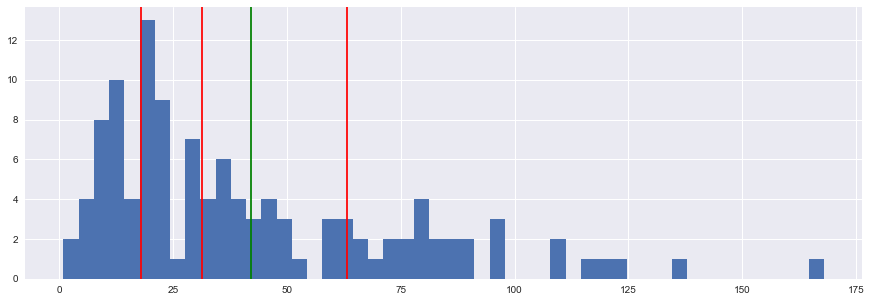

In [59]:
plt.figure(figsize=(15,5))
plt.hist(ozone_values,bins=50)
plt.axvline(x=np.mean(ozone_values),c='green')
plt.axvline(x=np.percentile(ozone_values,25), c='red')
plt.axvline(x=np.percentile(ozone_values,50), c='red')
plt.axvline(x=np.percentile(ozone_values,75), c='red')
;

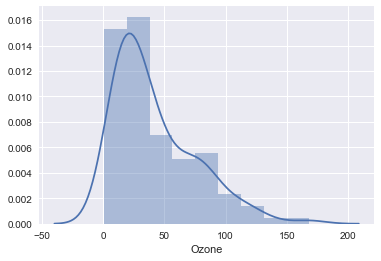

In [60]:
sns.distplot(airquality['Ozone'].dropna().astype(float))

According to these results, there are so many NaNs in *Ozone* column to just ignore or drop them. To fill them with the mean is not a option either as there is so many variance and extrem high values that seems to be anomalies. As we are working with a time series and each observation represents a concat day, fill NaNs with the first previous or following number might be a better option. Maybe, a better idea would be to fill them with the mean of the previous and the following value. 

#### NaNs *'Solar.R'* column

In [16]:
airquality[ airquality['Solar.R'].isna() ]

,Ozone,Solar.R,Wind,Temp,Month,Day
4,<NA>,<NA>,14.3,56,5,5
5,28,<NA>,14.9,66,5,6
10,7,<NA>,6.9,74,5,11
26,<NA>,<NA>,8.0,57,5,27
95,78,<NA>,6.9,86,8,4
96,35,<NA>,7.4,85,8,5
97,66,<NA>,4.6,87,8,6


In [18]:
airquality[ airquality['Solar.R'].isna() ].shape

(7, 6)

In [20]:
airquality['Solar.R'].describe()

count    146.000000
mean     185.931507
std       90.058422
min        7.000000
25%      115.750000
50%      205.000000
75%      258.750000
max      334.000000
Name: Solar.R, dtype: float64

In [61]:
rsolar_values = airquality['Solar.R'].dropna().astype(float).to_numpy()
rsolar_values

array([190., 118., 149., 313., 299.,  99.,  19., 194., 256., 290., 274.,
        65., 334., 307.,  78., 322.,  44.,   8., 320.,  25.,  92.,  66.,
       266.,  13., 252., 223., 279., 286., 287., 242., 186., 220., 264.,
       127., 273., 291., 323., 259., 250., 148., 332., 322., 191., 284.,
        37., 120., 137., 150.,  59.,  91., 250., 135., 127.,  47.,  98.,
        31., 138., 269., 248., 236., 101., 175., 314., 276., 267., 272.,
       175., 139., 264., 175., 291.,  48., 260., 274., 285., 187., 220.,
         7., 258., 295., 294., 223.,  81.,  82., 213., 275., 253., 254.,
        83.,  24.,  77., 255., 229., 207., 222., 137., 192., 273., 157.,
        64.,  71.,  51., 115., 244., 190., 259.,  36., 255., 212., 238.,
       215., 153., 203., 225., 237., 188., 167., 197., 183., 189.,  95.,
        92., 252., 220., 230., 259., 236., 259., 238.,  24., 112., 237.,
       224.,  27., 238., 201., 238.,  14., 139.,  49.,  20., 193., 145.,
       191., 131., 223.])

''

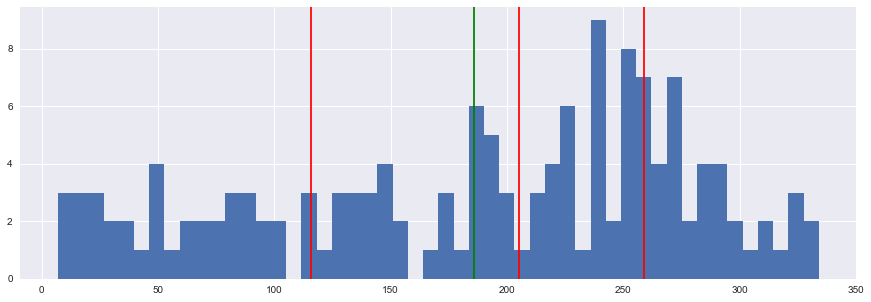

In [62]:
plt.figure(figsize=(15,5))
plt.hist(rsolar_values,bins=50)
plt.axvline(x=np.mean(rsolar_values),c='green')
plt.axvline(x=np.percentile(rsolar_values,25), c='red')
plt.axvline(x=np.percentile(rsolar_values,50), c='red')
plt.axvline(x=np.percentile(rsolar_values,75), c='red')
;

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


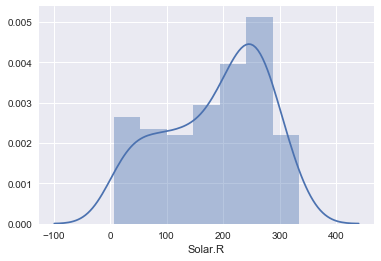

In [63]:
sns.distplot(airquality['Solar.R'].dropna().astype(float))

In this case, there is not so much NaNs (only 7). Anyway, dropping these rows would affect *'Ozone'* column if it is done before filling NaNs. Filling with the mean does not seem right as variance stays high and there is a clearly bias on data. As in the *'Ozone'* case, filling NaNs with the previous or following values (or the mean of the two of them) seems to be a better option.